In [41]:
!pip install nltk
!pip install wordcloud
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import nltk

nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Vikram\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vikram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vikram\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Libraries for Sentiment Analysis
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [47]:
# reading datasets
trump = pd.read_csv(r"C:\Users\Vikram\Downloads\archive\hashtag_donaldtrump.csv", lineterminator='\n')
print(trump.head(3))

            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   
2  2020-10-15 00:00:02  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   
2  #Trump: As a student I used to hear for years,...    2.0            1.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   
2   Twitter Web App    8436472.0              snarke           snarke   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   
2  Will mock for food! Freelance writer, blogger,.

In [48]:
# Display all the columns in the DataFrame
print(trump.columns)

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')


In [49]:
biden = pd.read_csv(r"C:\Users\Vikram\Downloads\archive\hashtag_donaldtrump.csv", lineterminator='\n')
print(biden.head(2))

            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   

  user_followers_count                 user_location       lat      long  \
0               1860.0  Philadelphia, PA / Miami, FL  25.77427 -80.19366   
1            1067661.0                           NaN       NaN       NaN   

   city    

In [50]:
print(trump.shape)
print(biden.shape)

(970919, 21)
(970919, 21)


In [51]:
# Getting trump dataset information
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970897 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869651 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675957 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [52]:
# Getting biden dataset information
biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970897 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869651 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675957 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [53]:
# creating a new column 'candidate' todifferentiate
# between tweets of Trump and Biden upon concatination
trump['candidate'] = 'trump'

# biden dataframe
biden['candidate'] = 'biden'

# combining the dataframes
data = pd.concat([trump, biden])

# FInal data shape
print('Final Data Shape :', data.shape)

# View the first 2 rows
print("\nFirst 2 rows:")
print(data.head(3))

Final Data Shape : (1941838, 22)

First 2 rows:
            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   
2  2020-10-15 00:00:02  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   
2  #Trump: As a student I used to hear for years,...    2.0            1.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   
2   Twitter Web App    8436472.0              snarke           snarke   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   
2 

In [54]:
# dropping null values if they exist
data.dropna(inplace=True)

In [55]:
data['country'].value_counts()

country
United States of America    193244
United Kingdom               37792
Germany                      22914
France                       22864
Canada                       20478
India                        19376
Australia                    10298
The Netherlands               9830
Spain                         6080
Brazil                        4296
Pakistan                      3514
Italy                         3450
Bangladesh                    2744
Ireland                       2366
Belgium                       2228
Nigeria                       2042
Mexico                        2040
South Africa                  1908
Switzerland                   1760
United Arab Emirates          1472
Peru                          1188
Lebanon                        980
Ecuador                        930
Argentina                      826
Colombia                       612
Honduras                       512
Venezuela                      470
New Zealand                    454
Poland      

In [56]:
data['country'] = data['country'].replace({'United States of America': "US",
										'United States': "US"})

In [57]:
# Group the data by 'candidate' and count the
# number of tweets for each candidate
tweets_count = data.groupby('candidate')['tweet'].count().reset_index()

# Interactive bar chart
fig = px.bar(tweets_count, x='candidate', y='tweet', color='candidate',
			color_discrete_map={'Trump': 'pink', 'Biden': 'blue'},
			labels={'candidate': 'Candidates', 'tweet': 'Number of Tweets'},
			title='Tweets for Candidates')

# Show the chart
fig.show()

In [58]:
# Interactive bar chart
likes_comparison = data.groupby('candidate')['likes'].sum().reset_index()
fig = px.bar(likes_comparison, x='candidate', y='likes', color='candidate',
			color_discrete_map={'Trump': 'blue', 'Biden': 'green'},
			labels={'candidate': 'Candidate', 'likes': 'Total Likes'},
			title='Comparison of Likes')

# Update the layout with a black theme
fig.update_layout(plot_bgcolor='black',
				paper_bgcolor='black', font_color='white')

# Show the chart
fig.show()

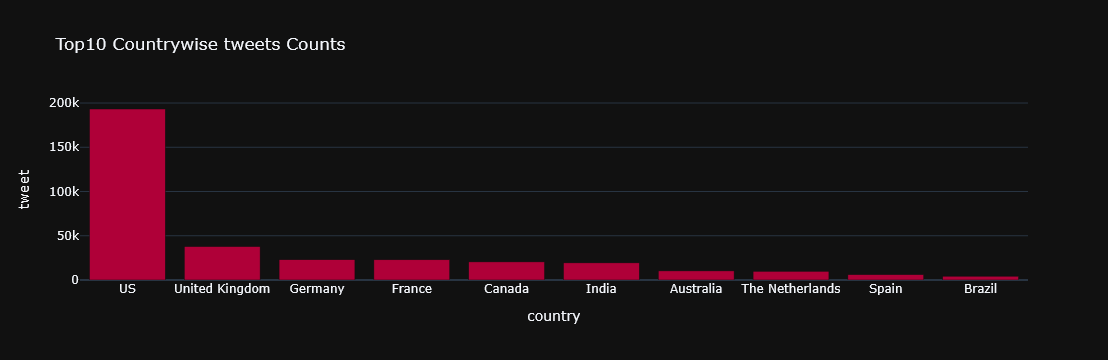

In [59]:
# Top10 Countrywise tweets Counts
top10countries = data.groupby('country')['tweet'].count(
).sort_values(ascending=False).reset_index().head(10)
# top10countries

# Interactive bar chart
fig = px.bar(top10countries, x='country', y='tweet',
			template='plotly_dark',
			color_discrete_sequence=px.colors.qualitative.Dark24_r,
			title='Top10 Countrywise tweets Counts')

# To view the graph
fig.show()

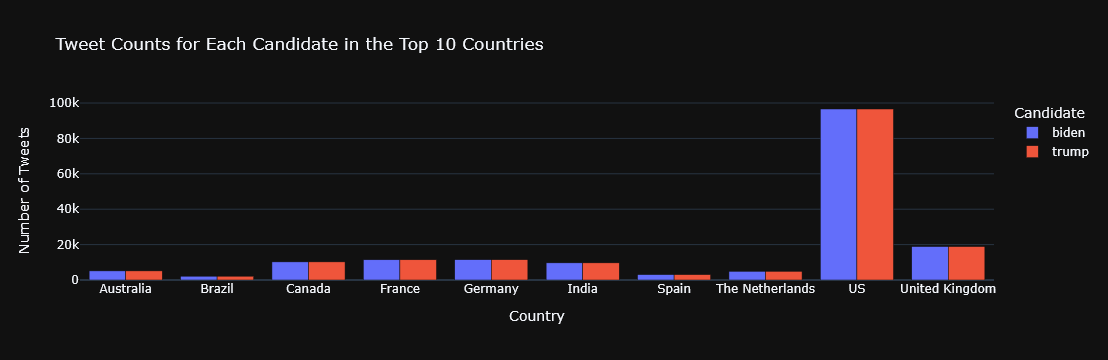

In [60]:
# the number of tweets done for each
# candidate by all the countries.
tweet_df = data.groupby(['country', 'candidate'])[
	'tweet'].count().reset_index()

# Candidate for top 10 country tweet
tweeters = tweet_df[tweet_df['country'].isin(top10countries.country)]

# Plot for tweet counts for each candidate
# in the top 10 countries
fig = px.bar(tweeters, x='country', y='tweet', color='candidate',
			labels={'country': 'Country', 'tweet': 'Number of Tweets',
					'candidate': 'Candidate'},
			title='Tweet Counts for Each Candidate in the Top 10 Countries',
			template='plotly_dark',
			barmode='group')

# Show the chart
fig.show()

In [61]:
def clean(text):
	# Remove URLs
	text = re.sub(r'https?://\S+|www\.\S+', '', str(text))

	# Convert text to lowercase
	text = text.lower()

	# Replace anything other than alphabets a-z with a space
	text = re.sub('[^a-z]', ' ', text)

	# Split the text into single words
	text = text.split()

	# Initialize WordNetLemmatizer
	lm = WordNetLemmatizer()

	# Lemmatize words and remove stopwords
	text = [lm.lemmatize(word) for word in text if word not in set(
		stopwords.words('english'))]

	# Join the words back into a sentence
	text = ' '.join(word for word in text)

	return text

In [62]:
def getpolarity(text):
	return TextBlob(text).sentiment.polarity

def getsubjectivity(text):
	return TextBlob(text).sentiment.subjectivity

def getAnalysis(score):
	if score < 0:
		return 'negative'
	elif score == 0:
		return 'neutral'
	else:
		return 'positive'

In [63]:
trump_tweets = data[data['candidate'] == 'trump']

# taking only U.S. country data
trump_tweets = trump_tweets.loc[trump_tweets.country == 'US']
trump_tweets = trump_tweets[['tweet']]
print(trump_tweets.head())

                                                tweet
2   #Trump: As a student I used to hear for years,...
4   You get a tie! And you get a tie! #Trump ‘s ra...
11  In 2020, #NYPost is being #censorship #CENSORE...
12  #Trump #PresidentTrump #Trump2020LandslideVict...
22  #Trump: Nobody likes to tell you this, but som...


In [64]:
trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean)
print(trump_tweets.head())

                                                tweet  \
2   #Trump: As a student I used to hear for years,...   
4   You get a tie! And you get a tie! #Trump ‘s ra...   
11  In 2020, #NYPost is being #censorship #CENSORE...   
12  #Trump #PresidentTrump #Trump2020LandslideVict...   
22  #Trump: Nobody likes to tell you this, but som...   

                                            cleantext  
2   trump student used hear year ten year heard ch...  
4                    get tie get tie trump rally iowa  
11  nypost censorship censored twitter manipulate ...  
12  trump presidenttrump trump landslidevictory tr...  
22  trump nobody like tell farmer better way worki...  


In [65]:
trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity)

In [66]:
trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity)

In [67]:
trump_tweets['analysis'] = trump_tweets['polarity'].apply(getAnalysis)
trump_tweets.head()

,tweet,cleantext,subjectivity,polarity,analysis
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa,0.000000,0.000000,neutral
11,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571,-0.148810,negative
12,#Trump #PresidentTrump #Trump2020LandslideVict...,trump presidenttrump trump landslidevictory tr...,0.750000,0.500000,positive
22,"#Trump: Nobody likes to tell you this, but som...",trump nobody like tell farmer better way worki...,0.595238,0.261905,positive


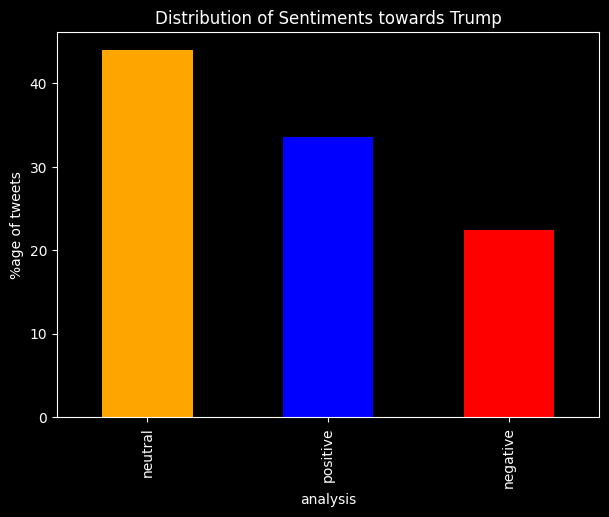

In [68]:
# how much data is positive/negetive/neutral
plt.style.use('dark_background') # Adding black theme

# Define colors for each bar
colors = ['orange', 'blue', 'red']

plt.figure(figsize=(7, 5))
(trump_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors)
plt.ylabel("%age of tweets")
plt.title("Distribution of Sentiments towards Trump")
plt.show()

Defaulting to user installation because normal site-packages is not writeable


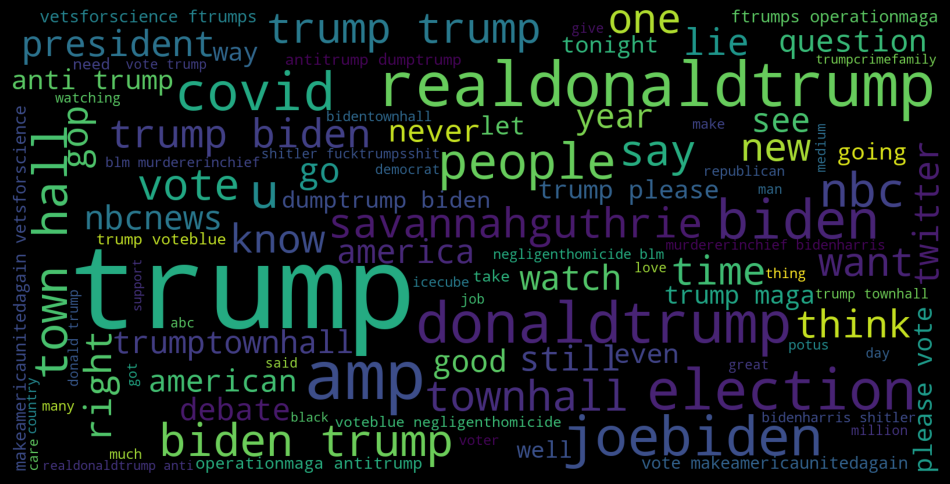

In [69]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def word_cloud(wd_list):
	stopwords = set(STOPWORDS)
	all_words = ' '.join(wd_list)
	wordcloud = WordCloud(background_color='black',
						stopwords=stopwords,
						width=1600, height=800, max_words=100, max_font_size=200,
						colormap="viridis").generate(all_words)
	plt.figure(figsize=(12, 10))
	plt.axis('off')
	plt.imshow(wordcloud)

word_cloud(trump_tweets['cleantext'][:5000])

In [70]:
biden_tweets = data[data['candidate'] == 'biden']
biden_tweets = biden_tweets.loc[biden_tweets.country == 'US']
biden_tweets = biden_tweets[['tweet']]
biden_tweets

,tweet
2,"#Trump: As a student I used to hear for years,..."
4,You get a tie! And you get a tie! #Trump ‘s ra...
11,"In 2020, #NYPost is being #censorship #CENSORE..."
12,#Trump #PresidentTrump #Trump2020LandslideVict...
22,"#Trump: Nobody likes to tell you this, but som..."
...,...
970865,#VanJones #cnn #CNNSOTU #Trump #BidenHarris202...
970875,#election #2020Elections #trump #biden https:/...
970881,"@RBReich Bob,\nit's pretty straight forward.\n..."
970890,Cómo pasó el abogado de Trump de un hotel a un...


In [71]:
biden_tweets['cleantext']=biden_tweets['tweet'].apply(clean)
biden_tweets.head()

,tweet,cleantext
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa
11,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...
12,#Trump #PresidentTrump #Trump2020LandslideVict...,trump presidenttrump trump landslidevictory tr...
22,"#Trump: Nobody likes to tell you this, but som...",trump nobody like tell farmer better way worki...


In [72]:
biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity)
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity)
biden_tweets['analysis'] = biden_tweets['polarity'].apply(getAnalysis)
biden_tweets.head()

,tweet,cleantext,subjectivity,polarity,analysis
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa,0.000000,0.000000,neutral
11,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571,-0.148810,negative
12,#Trump #PresidentTrump #Trump2020LandslideVict...,trump presidenttrump trump landslidevictory tr...,0.750000,0.500000,positive
22,"#Trump: Nobody likes to tell you this, but som...",trump nobody like tell farmer better way worki...,0.595238,0.261905,positive


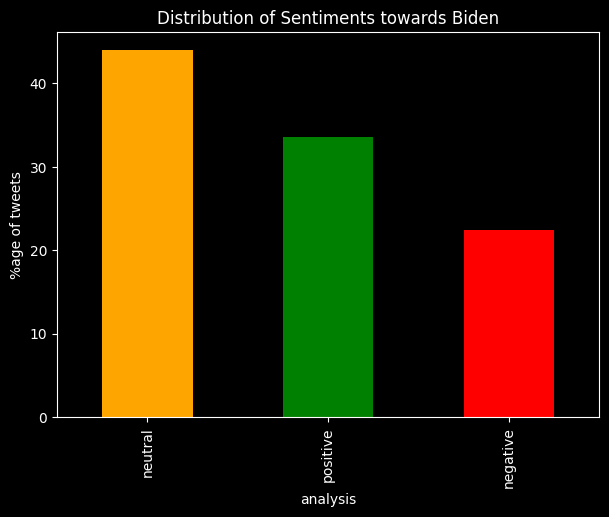

In [73]:
# how much data is positive/negetive/neutral
plt.style.use('dark_background')

# Define colors for each bar
colors = ['orange', 'green', 'red']

plt.figure(figsize=(7, 5))
(biden_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors)
plt.ylabel("%age of tweets")
plt.title("Distribution of Sentiments towards Biden")
plt.show()

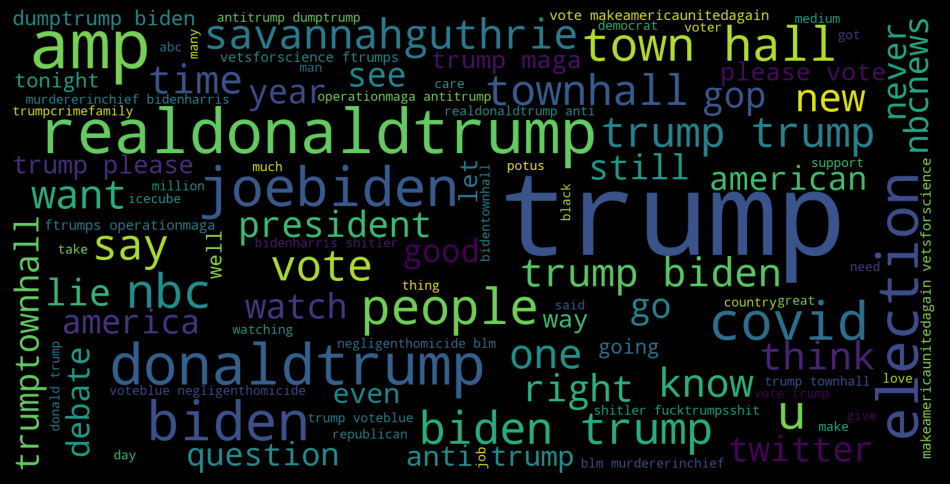

In [74]:
word_cloud(biden_tweets['cleantext'][:5000])

In [75]:
trump_tweets.analysis.value_counts(normalize=True)*100

analysis
neutral     43.995156
positive    33.566890
negative    22.437954
Name: proportion, dtype: float64

In [76]:
biden_tweets.analysis.value_counts(normalize=True)*100

analysis
neutral     43.995156
positive    33.566890
negative    22.437954
Name: proportion, dtype: float64

Positive Sentiment: Positive tweets about Biden outnumber positive tweets about Trump: Biden's tweets have a higher percentage of positive feelings (36.43%) than Trump's ( 33.99%). This shows that Twitter users are responding more favorably to Biden.

Neutral Sentiment: Trump receives more neutral sentiments: In contrast, Trump receives slightly more neutral sentiments (43.22%) in comparison to Biden (46.83%) in his tweets. This may indicate that Trump's tweets are more likely to be seen as neutral or impersonal, leading to a higher neutral sentiment rate.

Negative Sentiment: Trump gets more unfavorable reactions: While both candidates have received criticism, Trump's tweets have a greater percentage of unfavorable reactions (22.78%) than Biden's (16.79%). This implies that there may have been more opposition to Trump's tweets on Twitter.

With respect to the U.S. voters, it was highlighted a lot of times that Trump was the most talked about and tweeted about among people however, Trump has received more negative comments as compared to Joe Biden. As a result, Joe Biden won the 2020 elections which is a proven fact. However, overall, the competition was close as shown by the data.